# Visualizing Data - Part 1

In these exercises we will look at how we can visualize data using libraries from the Python universe.
The idea of these exercises is in introduce you to: 

 * data querying, grouping, etc. in Pandas (a library to help in the fast querying and manipulation of tabular data);
 * data visualization using some basic tools to see distributions and relationships
 * interactive data visualization using Altair
 * creating visualizations to help in communication of your findings.

There are number of libraries that are core to the work of a data scientist. On a daily basis I use all of the below:

 * [Matplotlib](http://matplotlib.org) is basic plotting library for Python inspired by Matlab. 
 * [Seaborn](http://stanford.edu/~mwaskom/software/seaborn) is a higher-level library built on top of matplotlib with integrated analysis and specialized plots. 
 * [Bokeh](https://bokeh.pydata.org/en/latest/docs/gallery.html) is a relatively low-level library that provides high performance and interactive plotting functionalities. It also has a new counterpart called [HoloViews](http://holoviews.org/) that provides a simpler API on top of Bokeh. 
 * [Altair](https://altair-viz.github.io/index.html) is a plotting library on top of Vega (JSON-driven visualization language), which allows for the use of a visual grammar to build our visualizations (rendered via HTML and JavaScript). 
 * [Plotly](https://plot.ly/) is another interactive plotting library that has free and paid-for services. It provides a number of extensions such as Dash for the creation of rich interactive dashboards.

Each provides a set of functionalities that will obviously have overlaps, but some benefits (e.g. sub-sampling of many points in a scatter plot from Bokeh) prove invaluable when scale is important.
Also, some libraries will have implementations of visualization X, and some will not. 
__It is for this reason that our tool box is often greater than just one tool.__

In part 1 we will first look at static visualizations in **Pandas**, **Matplotlib**, and **Seaborn**.

Then, in part 2 of the exercises, we proceed to using **Plotly** and **Altair** for more interactive visual exploration of data.

**We will see as we go along why we need certain libraries over others.**


In [1]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [12]:
%matplotlib inline

## Load Data

We're going to be using data on football player attributes from [FIFA 2019](https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global).. Why? Well, because it's fun, it's highly multi-dimensional, and we can process the data in an infinite number of ways. 




In [3]:
fifa = pd.read_csv('data/fifa_player_data.csv.gz', compression='gzip')

In [4]:
sorted(fifa.columns.tolist())

['Acceleration',
 'Age',
 'Aggression',
 'Agility',
 'Balance',
 'BallControl',
 'Body Type',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'Club',
 'Composure',
 'Contract Valid Until',
 'Crossing',
 'Curve',
 'Dribbling',
 'FKAccuracy',
 'Finishing',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'HeadingAccuracy',
 'Height',
 'ID',
 'Interceptions',
 'International Reputation',
 'Jersey Number',
 'Joined',
 'Jumping',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'Loaned From',
 'LongPassing',
 'LongShots',
 'Marking',
 'Name',
 'Nationality',
 'Overall',
 'Penalties',
 'Position',
 'Positioning',
 'Potential',
 'Preferred Foot',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'Reactions',
 'Release Clause',
 'ST',
 'ShortPassing',
 'ShotPower',
 'Skill Moves',
 'SlidingTackle',
 'Special',
 'SprintSpeed',
 'Stamina',
 'StandingTackle',
 'Strength',
 'Value',
 'Vision',
 'Volleys',
 'Wage',
 'Weak Foot',


## Pandas Basics

[Pandas](https://pandas.pydata.org/) is a fast, flexible library for the query and analysis of tabular data in Python. Under the hood it makes us of NumPy for the quick data operations and vector operations, and matplot for the visualization components.

Whilst the goal of these exercises is not necessarily to become experts in Pandas, you will need some basic knowledge to be able to create visualizations.

In [5]:
# We can also query our data
fifa.query('Position == "ST"').head()

ID               Name  Age Nationality  Overall  Potential  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
10  188545     R. Lewandowski   29      Poland       90         90   
16  202126            H. Kane   24     England       89         91   
23  153079          S. Agüero   30   Argentina       89         89   
36  173731            G. Bale   28       Wales       88         88   

                 Club   Value   Wage  Special  ... Composure  Marking  \
1            Juventus    €77M  €405K     2228  ...      95.0     28.0   
10  FC Bayern München    €77M  €205K     2152  ...      86.0     34.0   
16  Tottenham Hotspur  €83.5M  €205K     2165  ...      89.0     56.0   
23    Manchester City  €64.5M  €300K     2107  ...      90.0     30.0   
36        Real Madrid    €60M  €355K     2279  ...      86.0     54.0   

    StandingTackle  SlidingTackle GKDiving GKHandling GKKicking  \
1             31.0           23.0      7.0       11.0      15.0   
10            42.0           19.0     15.0        6.0      12.0   
16            36.0           38.0      8.0       10.0      11.0   
23            20.0           12.0     13.0       15.0       6.0   
36            55.0           52.0     15.0       15.0      11.0   

    GKPositioning GKReflexes Release Clause  
1            14.0       11.0        €127.1M  
10            8.0       10.0        €127.1M  
16           14.0       11.0        €160.7M  
23           11.0       14.0        €119.3M  
36            5.0        6.0          €123M  

[5 rows x 84 columns]

In [6]:
# We can also sort the data in any number of ways
fifa.sort_values('Acceleration', ascending=False).head(5)

ID           Name  Age    Nationality  Overall  Potential  \
1968  213956          Adama   22          Spain       75         85   
65    190483  Douglas Costa   27         Brazil       86         86   
5886  212807      K. Manneh   23  United States       69         76   
25    231747      K. Mbappé   19         France       88         95   
2587  184312    J. Biabiany   30         France       74         74   

                         Club   Value   Wage  Special  ... Composure  Marking  \
1968  Wolverhampton Wanderers  €10.5M   €54K     1772  ...      70.0     16.0   
65                   Juventus  €46.5M  €175K     2111  ...      84.0     45.0   
5886            FC St. Gallen   €1.5M    €7K     1792  ...      68.0     31.0   
25        Paris Saint-Germain    €81M  €100K     2118  ...      86.0     34.0   
2587                    Parma   €5.5M   €38K     1803  ...      65.0     27.0   

      StandingTackle  SlidingTackle GKDiving GKHandling GKKicking  \
1968            26.0           23.0     13.0        9.0      11.0   
65              38.0           34.0     13.0       15.0       9.0   
5886            46.0           29.0      9.0       11.0      14.0   
25              34.0           32.0     13.0        5.0       7.0   
2587            30.0           30.0     11.0        5.0       9.0   

      GKPositioning GKReflexes Release Clause  
1968           12.0        7.0         €22.1M  
65             12.0        5.0         €76.7M  
5886           10.0        9.0          €2.4M  
25             11.0        6.0        €166.1M  
2587            6.0        5.0          €9.9M  

[5 rows x 84 columns]

In [7]:
# We can also make the sort work on numerous values
fifa.sort_values(['Acceleration', 'Curve'], ascending=False).head(5)

ID           Name  Age    Nationality  Overall  Potential  \
65    190483  Douglas Costa   27         Brazil       86         86   
1968  213956          Adama   22          Spain       75         85   
25    231747      K. Mbappé   19         France       88         95   
5886  212807      K. Manneh   23  United States       69         76   
164   213345       K. Coman   22         France       83         87   

                         Club   Value   Wage  Special  ... Composure  Marking  \
65                   Juventus  €46.5M  €175K     2111  ...      84.0     45.0   
1968  Wolverhampton Wanderers  €10.5M   €54K     1772  ...      70.0     16.0   
25        Paris Saint-Germain    €81M  €100K     2118  ...      86.0     34.0   
5886            FC St. Gallen   €1.5M    €7K     1792  ...      68.0     31.0   
164         FC Bayern München    €34M   €85K     1918  ...      75.0     29.0   

      StandingTackle  SlidingTackle GKDiving GKHandling GKKicking  \
65              38.0           34.0     13.0       15.0       9.0   
1968            26.0           23.0     13.0        9.0      11.0   
25              34.0           32.0     13.0        5.0       7.0   
5886            46.0           29.0      9.0       11.0      14.0   
164             17.0           15.0      5.0        3.0       5.0   

      GKPositioning GKReflexes Release Clause  
65             12.0        5.0         €76.7M  
1968           12.0        7.0         €22.1M  
25             11.0        6.0        €166.1M  
5886           10.0        9.0          €2.4M  
164             3.0        5.0         €58.7M  

[5 rows x 84 columns]

### Grouping

We can even group items much like we'd do in SQL, perform calculations on some aggregated property, then plot values, just to get an idea of larger scale trends

In [8]:
fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10)

BallControl
Nationality             
Argentina           96.0
Brazil              95.0
Spain               95.0
Belgium             94.0
Portugal            94.0
Croatia             93.0
Italy               93.0
Denmark             91.0
France              91.0
Germany             90.0

In [9]:
# Get the most popular nationalities
fifa.groupby('Nationality').size().sort_values(ascending=False).head(10)

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
dtype: int64

In [10]:
# Get the most popular nationalities
fifa.groupby('Position').size().sort_values(ascending=False).head(10)

Position
ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
dtype: int64

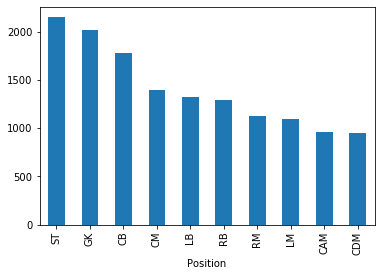

In [11]:
# Or we can call the plot function to get a graphical representation of this.
fifa.groupby('Position').size().sort_values(ascending=False).head(10).plot(kind='bar')

We can also plot this data directly using the matplotlib bindings linked from Pandas.

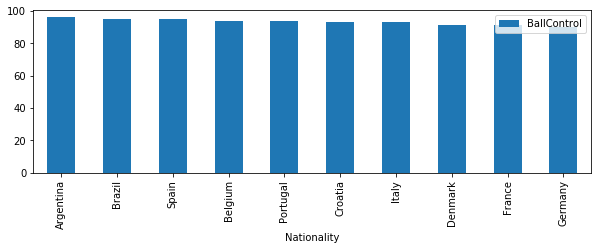

In [12]:
fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10).plot(kind='bar', figsize=(10, 3))

## Styling Plots (Matplotlib)

In this set of exercises, we are using Matplotlib as the underlying plotting library for Pandas and also Seaborn.
As such, we can change the styling to remove what is termed chart junk from the plots in order to bring focus to the data, not that which merely decorates it.

A full list of all customizable options is here https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html.

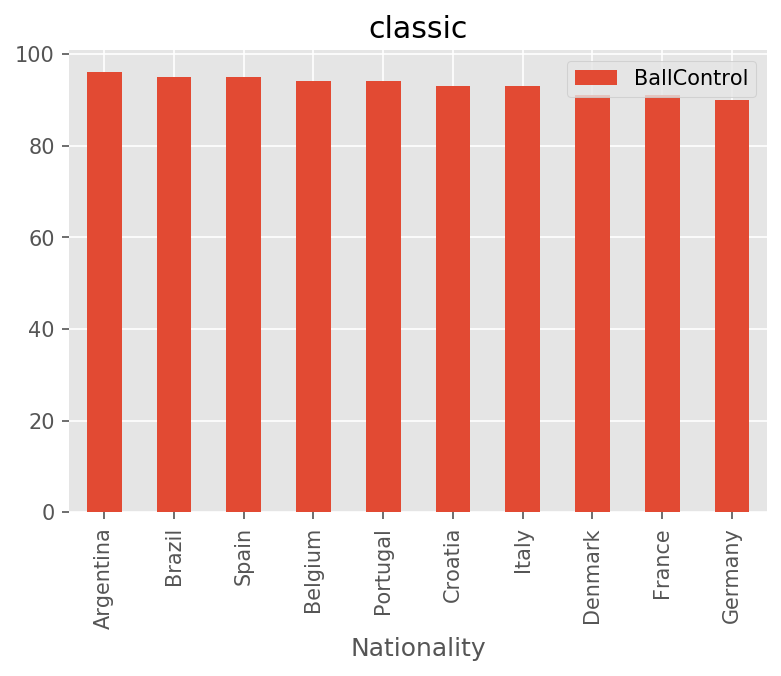

In [136]:
# There is a list of often fairly garish styles that are available, e.g. this one below. 
# You can also try seaborn seaborn-colorblind, Solarize_Light2, seaborn-dark-palette

with plt.style.context('ggplot') as s:
        fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10).plot(kind='bar', title=style_txt)

In our case, what we'll do is clean up the charts in terms of the use of the dark black lines for example. 
These serve no practical purpose.

We should 

In [137]:
# Here are some settings I use to remove some distractions including axis spines etc. that often distract from the visualization.

pd.set_option("display.max_columns",None)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['axes.labelcolor'] = '#555555'
plt.rcParams['text.color'] = 'black'
plt.rcParams['figure.figsize'] = 6,4
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.titleweight'] = 'normal'
plt.rcParams['font.family'] = 'sans-serif'

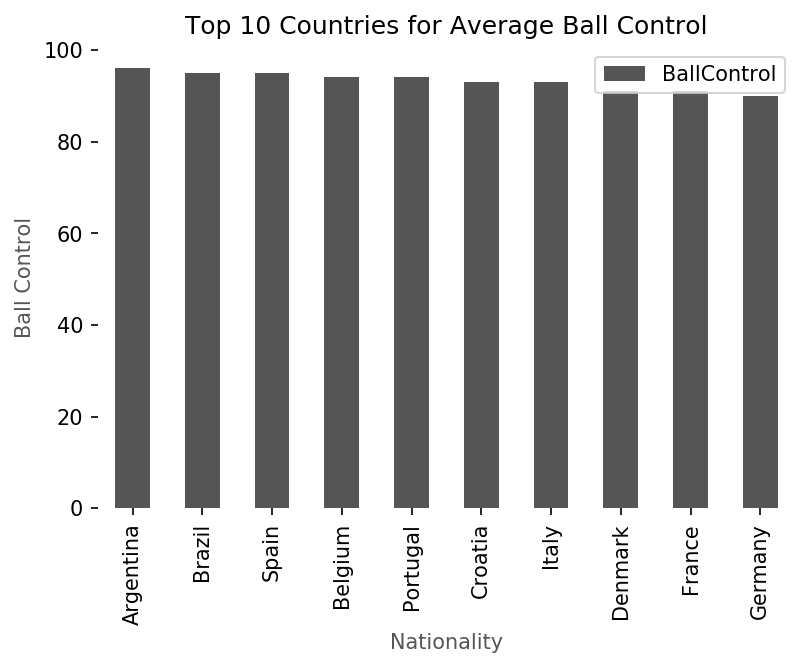

In [138]:
fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10).plot(kind='bar', title='Top 10 Countries for Average Ball Control', color='#555555')
plt.ylabel('Ball Control');

If you so wanted, you could also restrict the Y axis to make the differences more obvious between the groups (but be careful when doing this). This is a technique, as shown in the lectures, to make people believe the differences are bigger than they are.

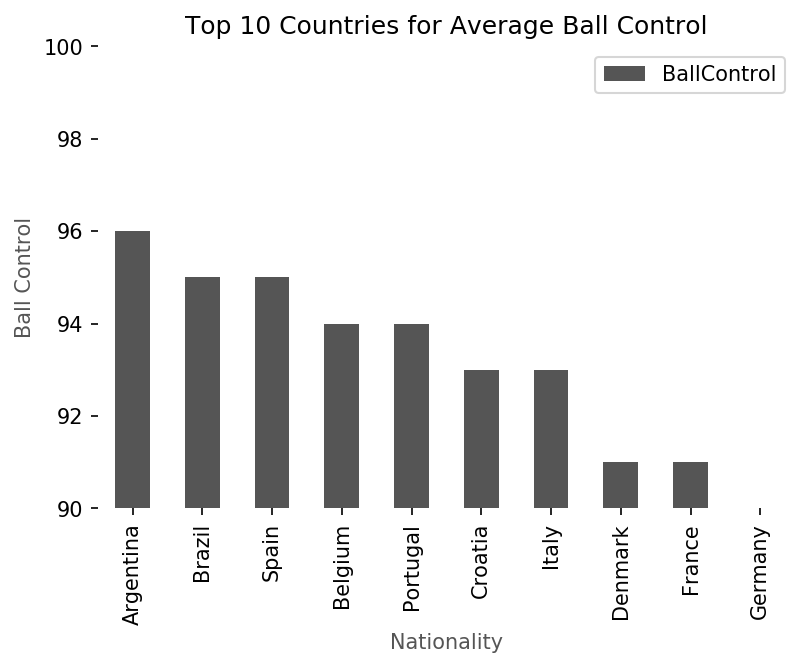

In [139]:
fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10).plot(kind='bar', title='Top 10 Countries for Average Ball Control', color='#555555')
plt.ylabel('Ball Control');
plt.ylim([90,100]);

<p style="color:#f1c40f; font-size: 2em">Exercise 1</p>

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">Which <strong>Position</strong> has the players with the highest average <strong>Speed</strong>?</p>

In [41]:
# Answer 1
fifa.groupby('Position').agg({'SprintSpeed':'mean'}).sort_values('SprintSpeed', ascending=False).head(10)

SprintSpeed
Position             
RW          77.029730
LW          76.721785
RM          76.288256
LM          75.818265
LF          75.066667
RAM         74.904762
LWB         74.217949
LAM         74.047619
RWB         73.574713
RF          73.562500

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">Which <strong>Club</strong> has the players with the highest average <strong>Speed</strong>?</p>

In [42]:
# Answer 2
fifa.groupby('Club').agg({'SprintSpeed':'mean'}).sort_values('SprintSpeed', ascending=False).head(10)

SprintSpeed
Club                            
Juventus               74.120000
PSV                    73.200000
Borussia Dortmund      73.060606
Paris Saint-Germain    72.633333
Olympique Lyonnais     72.482759
Ipswich Town           71.733333
Liverpool              71.363636
Ajax                   71.333333
New York Red Bulls     71.206897
Manchester United      71.121212

## Visualizing Distributions

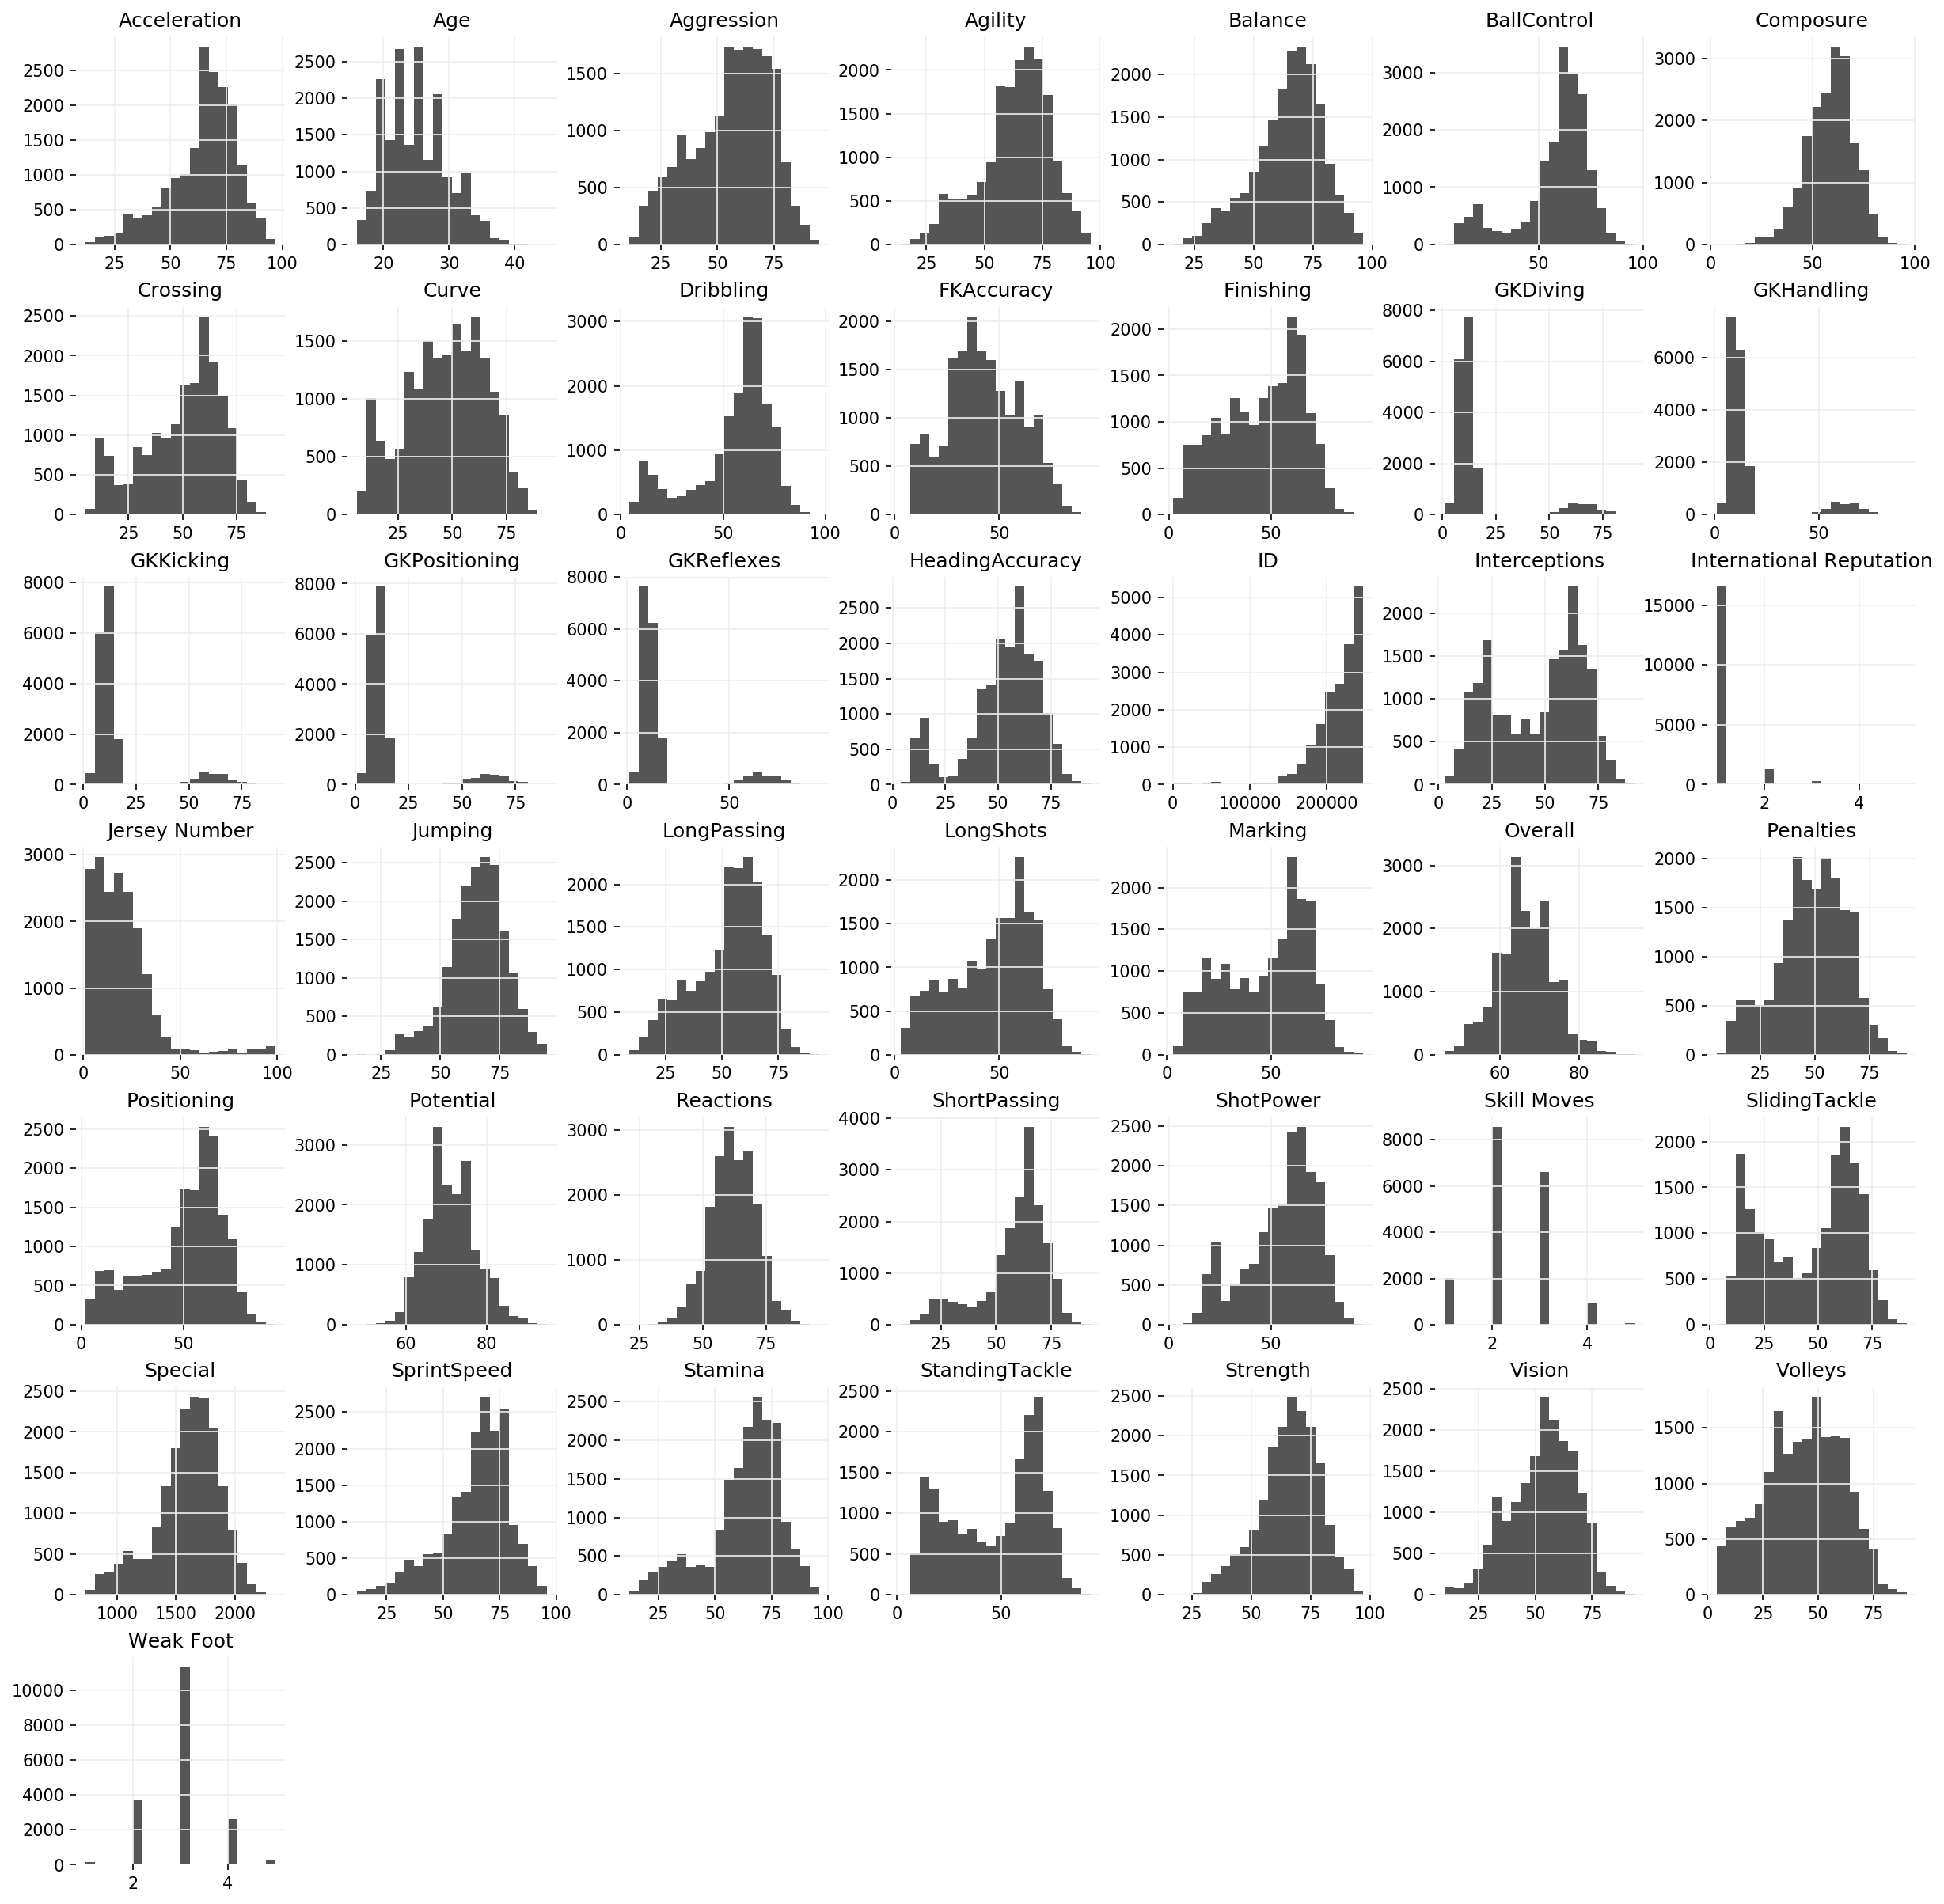

In [134]:
# Directly from our dataframe, we can plot the distributions for all of our features, just to see how everything looks
fifa.hist(bins=20, figsize=(20,20), color='#555555');

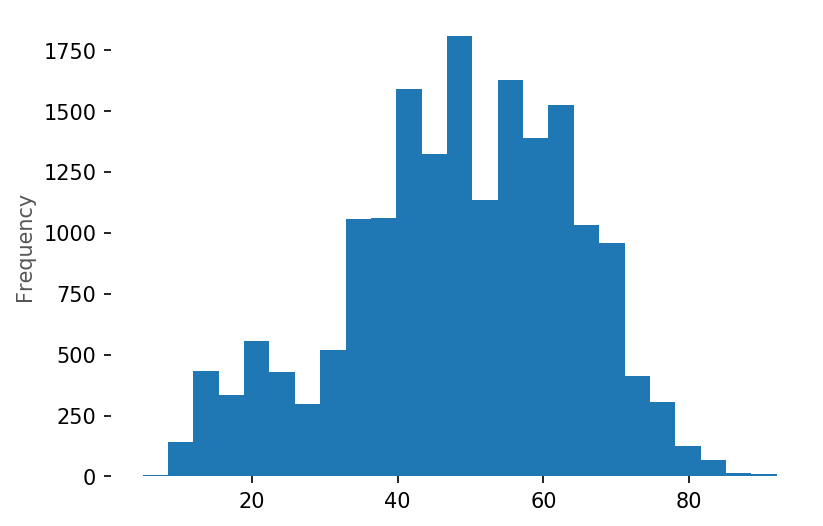

In [135]:
# We can plot the distribution for just one of our features, and also change the number of bins.
fifa.Penalties.plot(kind='hist', bins=25);

This data is a at first glance at little strange. Unfortunately, in FIFA, many players in a squad will not be in the first team. Therefore we have many players classified as 'Sub' or 'Res'. We also have some CF (Centre Forwards) but this is the same as a 'ST' (Striker). 

** Many of our analyses may not care about the position, but in the ones that do, we should ideally clean our data. **

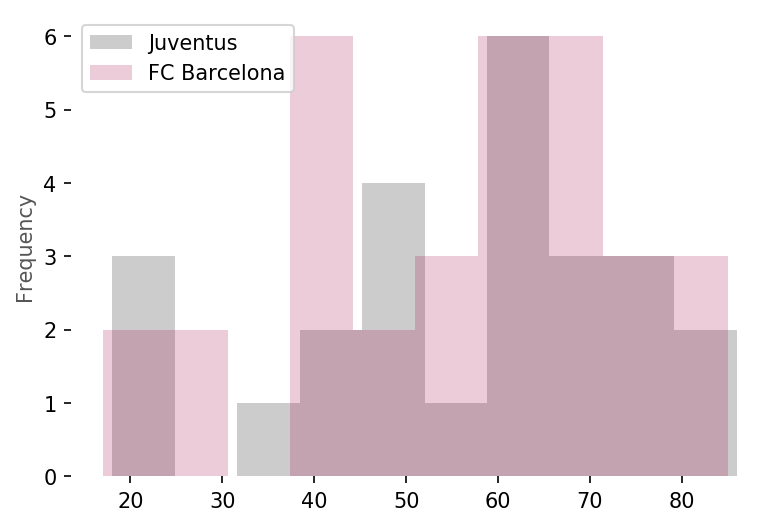

In [140]:
# seaborn also offers not just a histogram but also an kernel density enstimation
# sns.distplot(fifa.Rating,bins=50, color='#2ecc71')

fifa.query('Club == "Juventus"').Penalties.plot(kind='hist', bins=10, color='black', alpha=0.2, label='Juventus')
fifa.query('Club == "FC Barcelona"').Penalties.plot(kind='hist', bins=10, color='#a70042', alpha=0.2, label='FC Barcelona')

plt.legend()

<p style="color:#f1c40f; font-size: 2em">Exercise 2</p>

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">EASY: Plot the distributions for <strong>Acceleration</strong>.</p>

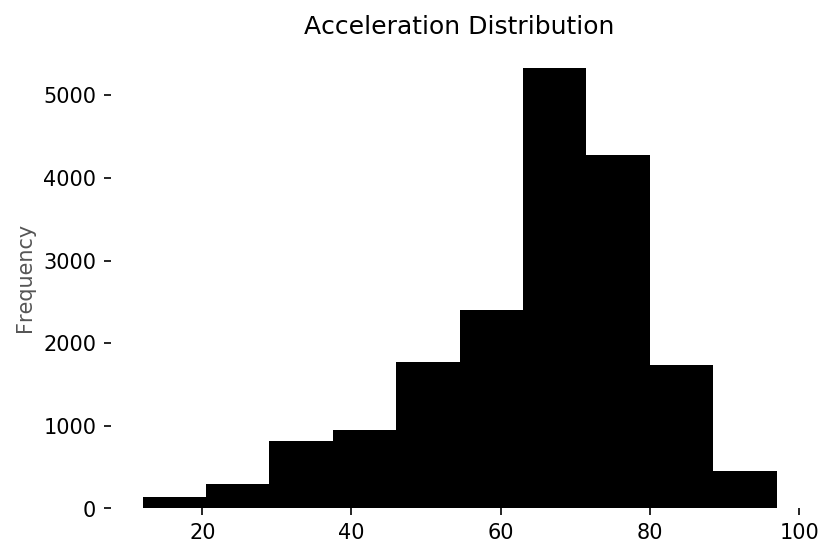

In [142]:
# Answer 4
fifa.Acceleration.plot(kind='hist', bins=10, color='black', title='Acceleration Distribution')

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">Easy: Plot two histograms, one on top of the other for <strong>Acceleration</strong> of Italian Players vs Brazilian players.</p>

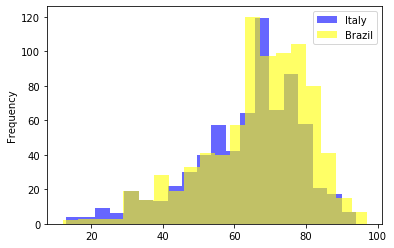

In [73]:
# Answer 5
fifa.query('Nationality == "Italy"').Acceleration.plot(kind='hist', bins=20, color='blue', alpha=0.6, label='Italy')
fifa.query('Nationality == "Brazil"').Acceleration.plot(kind='hist', bins=20, color='yellow', alpha=0.6, label='Brazil')

plt.legend()

### Box Plots

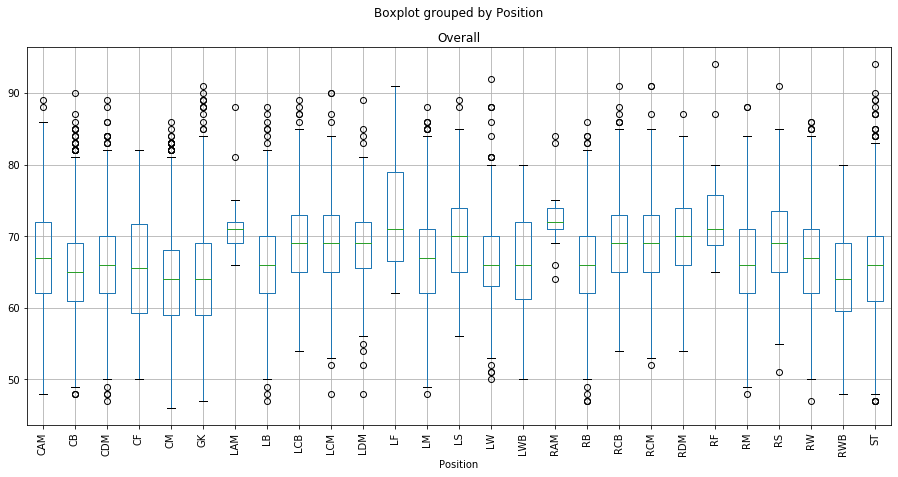

In [88]:
#group by continent
fifa.boxplot('Overall', by='Position', rot=90, figsize=(15, 7));

We can also use Seaborn to visualize Boxplots, which provides nicer styling by default, but as you'll see, the syntax is as easy as using the boxplot function from Pandas.

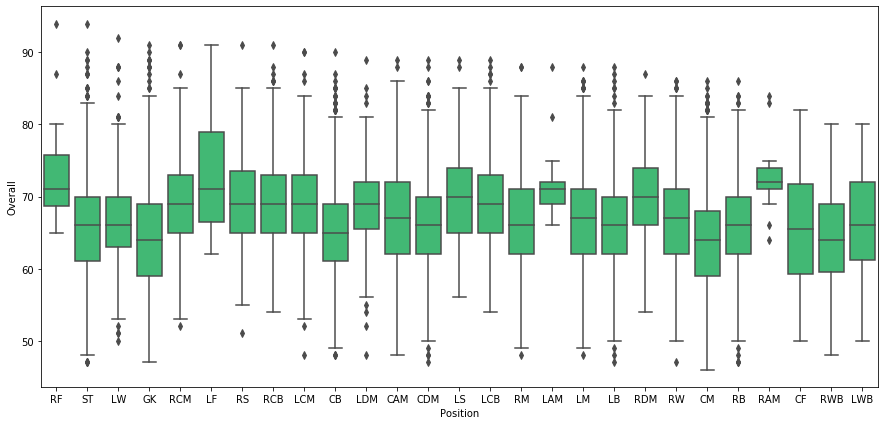

In [125]:

fig = plt.figure(figsize=(15, 7))
g = sns.boxplot(x="Position", y="Overall", data=fifa, palette=sns.color_palette(['#2ecc71']))

### Swarm Plots

These plots the actual points, with some jitter to help us see how many points (roughly are around particular values).

We will use a sample of the data for this, to avoid rendering all data points.

In [128]:
sample_data = fifa.sample(2000)

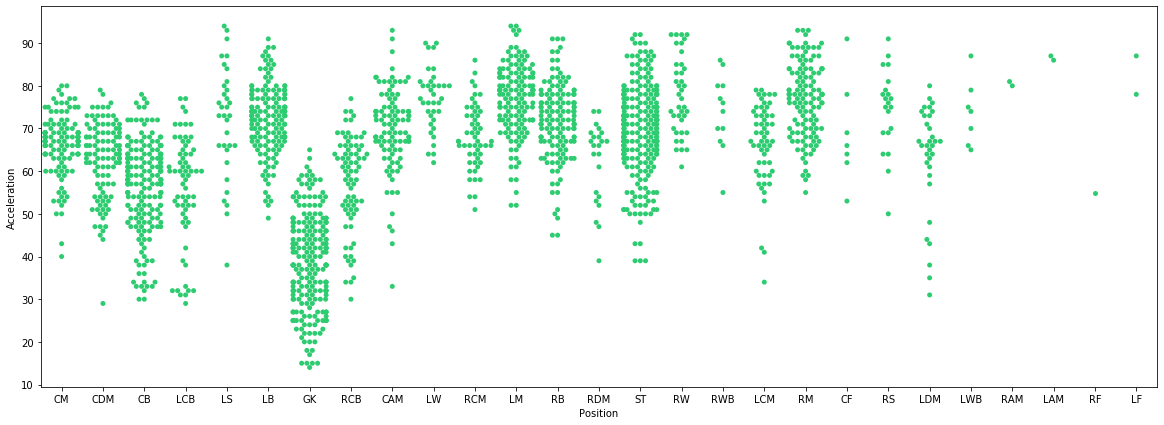

In [130]:
fig = plt.figure(figsize=(20, 7))
g = sns.swarmplot(x="Position", y="Acceleration", data=sample_data, palette=sns.color_palette(['#2ecc71']))

**Swarm Plots** can also be overlaid on top of other plots.

We use a sample here, otherwise there are many points to plot.

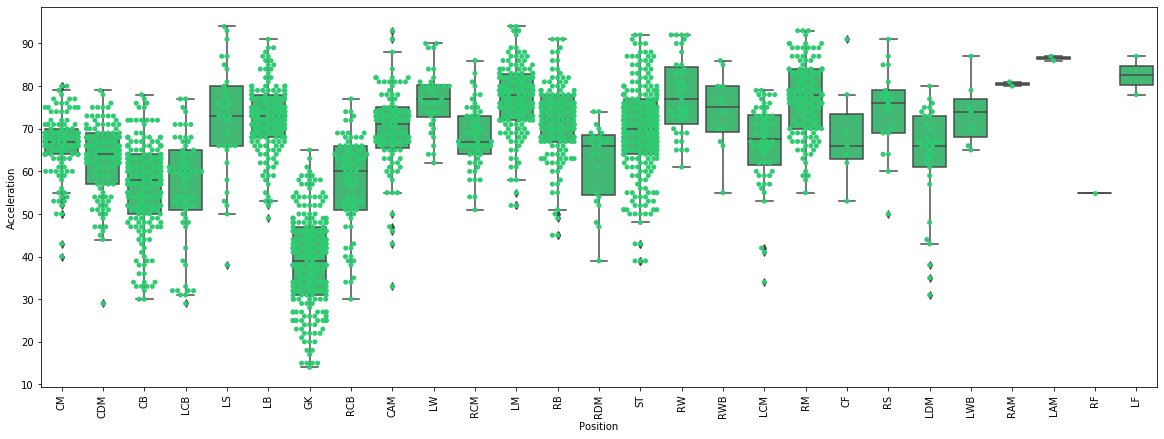

In [142]:
fig = plt.figure(figsize=(20, 7))
g = sns.boxplot(x="Position", y="Acceleration", data=sample_data, palette=sns.color_palette(['#2ecc71']))
g = sns.swarmplot(x="Position", y="Acceleration", data=sample_data, palette=sns.color_palette(['#2ecc71']))
plt.setp(g.get_xticklabels(), rotation=90);

It's quite hard to see from this plot which position is the fastest, (slowest is easier). It would be useful to be able to sort the X axis so that comparison is easier and **less cognitively demanding**.

What we can do is provide an order variable to the box and swarm plots to tell Seaborn what order we wish to display the data in on the X axis.

In [143]:
# This groups by the Position, then gets the average Acceleration per position, and sorts the values in descending order. Finally, we take the index, which is the position (due to the groupby).
fastest_average = sample_data.groupby('Position').agg({'Acceleration': 'mean'}).sort_values('Acceleration', ascending=False).index

In [144]:
fastest_average

Index(['LAM', 'LF', 'RAM', 'RW', 'RM', 'LW', 'LM', 'RS', 'RWB', 'LWB', 'LB',
       'LS', 'RB', 'CAM', 'ST', 'CF', 'RCM', 'LCM', 'CM', 'LDM', 'CDM', 'RDM',
       'RCB', 'CB', 'LCB', 'RF', 'GK'],
      dtype='object', name='Position')

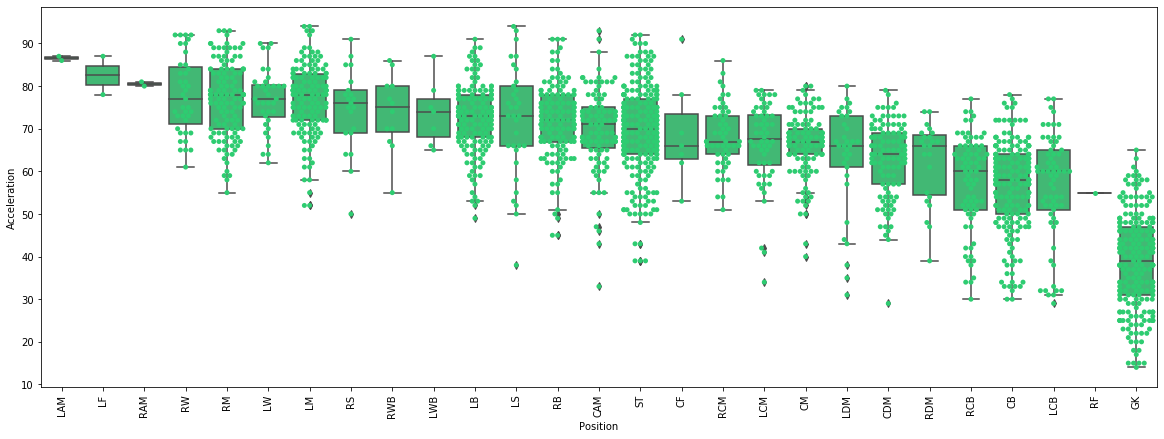

In [145]:
fig = plt.figure(figsize=(20, 7))
g = sns.boxplot(x="Position", y="Acceleration", data=sample_data, order=fastest_average, palette=sns.color_palette(['#2ecc71']))
g = sns.swarmplot(x="Position", y="Acceleration", data=sample_data, order=fastest_average, palette=sns.color_palette(['#2ecc71']))
plt.setp(g.get_xticklabels(), rotation=90);

This simple transformation makes it much easier for users to extract information from the plot!

Our users will thank us...maybe.

### Violin Plots

As shown in the lectures, Boxplots, can often hide the true distributions. 

Whilst the Boxplots with the Swarmplots let us see more of the data, the approach is not always scalable (if we have millions of data points, we can't easily plot millions of points in Matplotlib on our machines).

Since there are no violin plots by default in Matplotlib, we can use Seaborn for this. **This is reason we need multiple libraries in our toolbox.**

<p style="color:#f1c40f; font-size: 2em">Exercise 3</p>

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">Easy: Take a look at the <a href="https://seaborn.pydata.org/examples/index.html" target="_new">Seaborn gallery</a> and find how you can use the Violinplot in your analysis. </p>

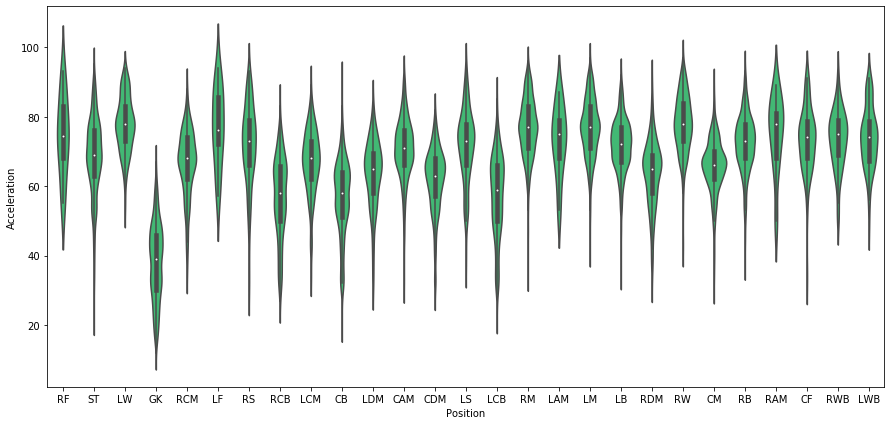

In [133]:
# Violin plots do a better job of showing us the number of support points across the distribution
fig = plt.figure(figsize=(20, 7))
g = sns.violinplot(x="Position", y="Acceleration", data=fifa, palette=sns.color_palette(['#2ecc71']))

In [ ]:
The Seaborn also allows for direct comparisons of groups within the Violin plot

### Boxen Plots

Boxen Plots do an equally good job of showing us how many points on the Y axis by having a rectangle that scales by the number of points in each bin. I actually prefer Boxenplots to Violinplots.

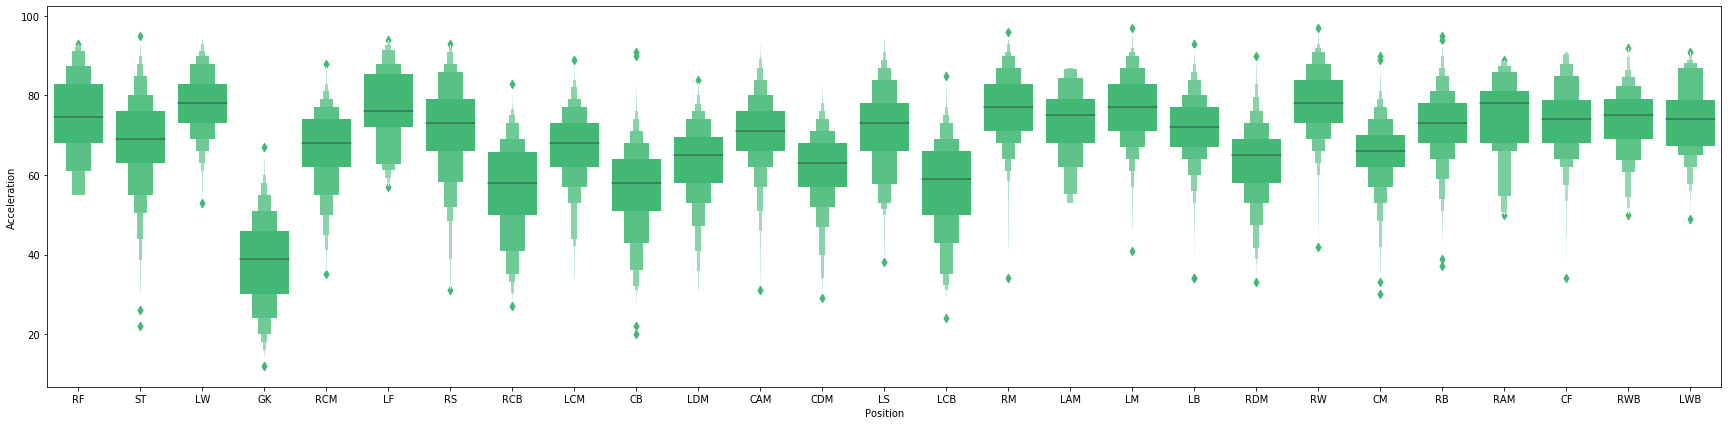

In [147]:
fig = plt.figure(figsize=(30, 7))
g = sns.boxenplot(x="Position", y="Acceleration", data=fifa, palette=sns.color_palette(['#2ecc71']))

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">Easy: Create a plot showing the distribution of SprintSpeed by Position.</p>

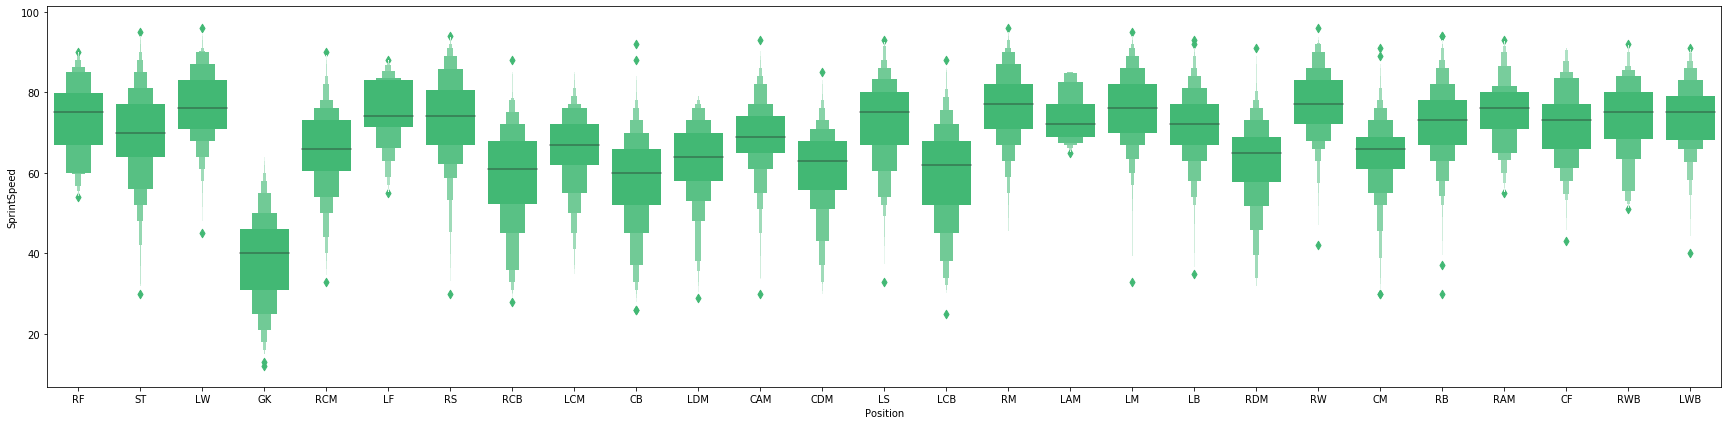

In [149]:
# Answer 6a
fig = plt.figure(figsize=(30, 7))
g = sns.boxenplot(x="Position", y="SprintSpeed", data=fifa, palette=sns.color_palette(['#2ecc71']))

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">Easy: Can you sort the positions by the average SprintSpeed (see example above for the Boxplot...).</p>

In [ ]:
# Answer 6b


## Visualizing Joint Distributions

We can also look at the correlations between variables in the traditional scatter plot. We can create them in a number of ways.

### Scatter Plots

Text(0, 0.5, 'Sprint Speed')

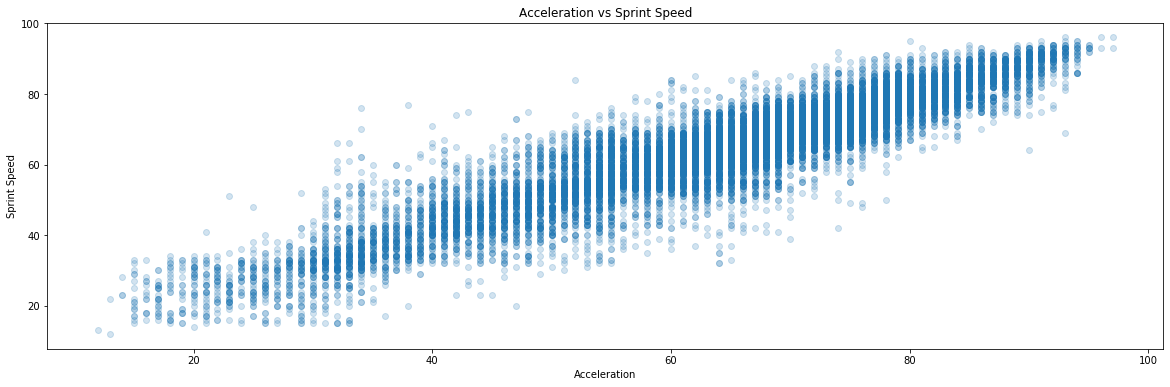

In [98]:
# The first way is using Matplotlib
plt.figure(figsize=(20,6))
plt.scatter(x=fifa['Acceleration'],y=fifa['SprintSpeed'], alpha=0.2)
plt.title('Acceleration vs Sprint Speed')
plt.xlabel('Acceleration')
plt.ylabel('Sprint Speed')

There is an obvious correlation here between Acceleration and SprintSpeed. Intuitively, we would expect this.

In [152]:
# Of course, the summary statistics nicely made available through Pandas helper functions will confirm this :)
fifa[['Acceleration', 'SprintSpeed']].corr()

Acceleration  SprintSpeed
Acceleration      1.000000     0.921928
SprintSpeed       0.921928     1.000000

We can also create one image with many plots inside. Here we'll create a number of subplots using matplotlib.

There are other ways of doing this too using subplot2grid for instance, but this is the easiest for now.

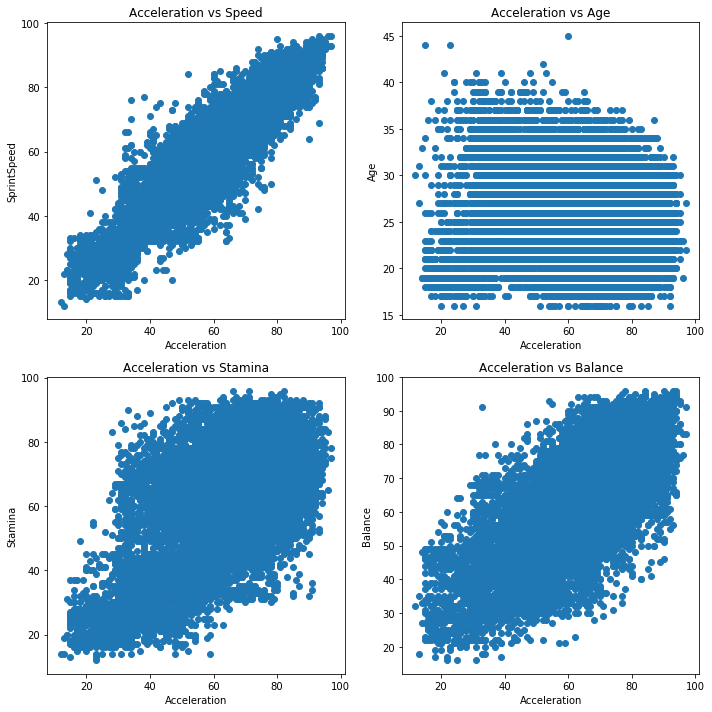

In [155]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

# We can access each subplot via a 2D Axes Array.
# An easier way in which to access the axes is to use axes.ravel() which will turn the 2D array into a 1D array
# and allow you to reference the first plot with axes[0], second with axes[1] and so on.

axes[0,0].scatter(x=fifa['Acceleration'],y=fifa['SprintSpeed'])
axes[0,0].title.set_text('Acceleration vs Speed')
axes[0,0].set_ylabel('SprintSpeed')
axes[0,0].set_xlabel('Acceleration')

axes[0,1].scatter(x=fifa['Acceleration'],y=fifa['Age'])
axes[0,1].title.set_text('Acceleration vs Age')
axes[0,1].set_xlabel('Acceleration')
axes[0,1].set_ylabel('Age')

axes[1,1].scatter(x=fifa['Acceleration'],y=fifa['Balance'])
axes[1,1].title.set_text('Acceleration vs Balance')
axes[1,1].set_xlabel('Acceleration')
axes[1,1].set_ylabel('Balance')


axes[1,0].scatter(x=fifa['Acceleration'],y=fifa['Stamina'])
axes[1,0].title.set_text('Acceleration vs Stamina')
axes[1,0].set_xlabel('Acceleration')
axes[1,0].set_ylabel('Stamina')

# tight_layout ensures that the labels are readable between plots.
# Try with and without, in this example the difference will be small,
# but more complex plots with messy labels will confuse matters.
plt.tight_layout()
plt.show()

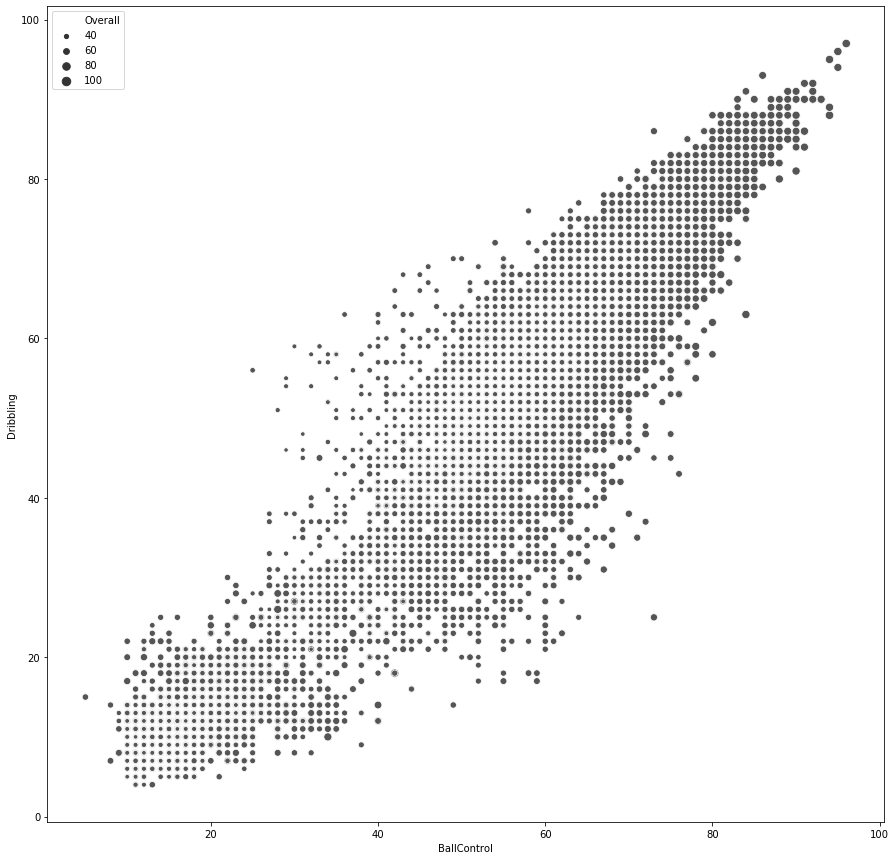

In [162]:
plt.figure(figsize=(15,15))
g = sns.scatterplot("BallControl", "Dribbling", size='Overall', data=fifa, color="#555555")

### Joint Plots

Seaborn offers a lot of functionality out of the box.
For instance, the joint plot gives us both histograms for the distributions of each variable, and also the joint distribution in the form of a scatter plot.

For the first basic plot, we will plot the regression line alongside the points and marginal distributions. Seems complicated, but this is very easy in Seaborn.

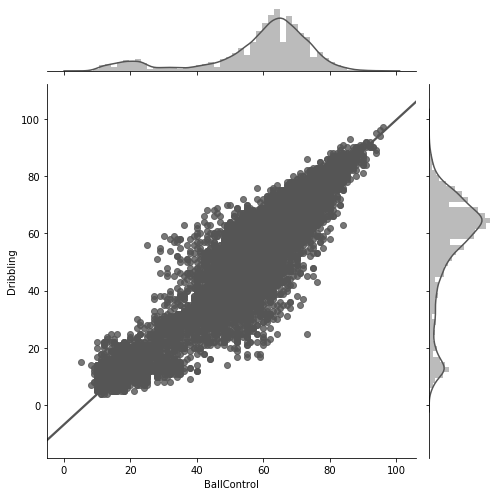

In [170]:
sns.jointplot("BallControl", "Dribbling", data=fifa, kind="reg", color="#555555", size=7)

In this version we'll plot densities using the hexbins. This will reduce the noise a bit a show us the marginal distributions again but also a view of where the largest number of points is distributed.

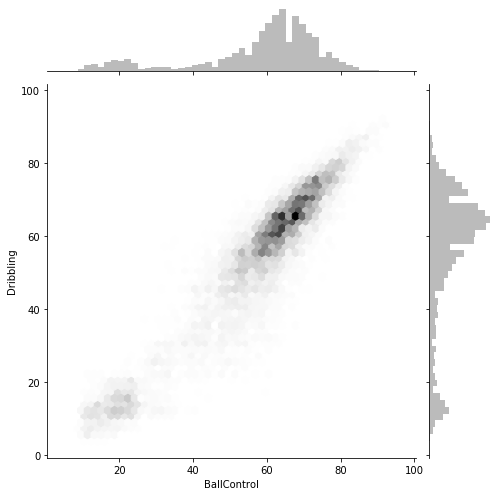

In [174]:
sns.jointplot("BallControl", "Dribbling", data=fifa, kind="hex", color="#555555", size=7)

Finally, we can use the Kernel Density Estimate (KDE) which provides a smooth estimation of the underlying disribution. This will reduce the noise a bit a show us the marginal distributions again but also a view of where the largest number of points is distributed.

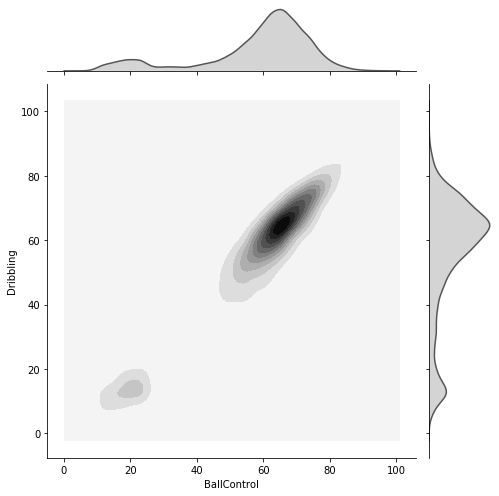

In [171]:
sns.jointplot("BallControl", "Dribbling", data=fifa, kind="kde", color="#555555", size=7)

As in the Hex plot, we can see two distinct groups in the data.

<p style="color:#f1c40f; font-size: 2em">Exercise 4</p>

<br/>
<div style="background: #f1c40f; padding: 10px; color: #2c3e50"><p>EASY: Which features are more correlated? </p>
<ul>
<li><strong>Reactions</strong> and <strong>Speed</strong>;</li>
<li><strong>Reactions</strong> and <strong>Curve</strong>; or</li>
<li><strong>Reactions</strong> and <strong>Composure</strong></li>
</ul>
</div>

In [ ]:
# Answer 7


## Multivariate Distributions

So far, we've seen how we can we can visualize one or two variables and their distributions, but we often have many more variables. Therefore we'd like to be able to visualize more at once to discover areas of interest.

### Scatter Plot Matrices

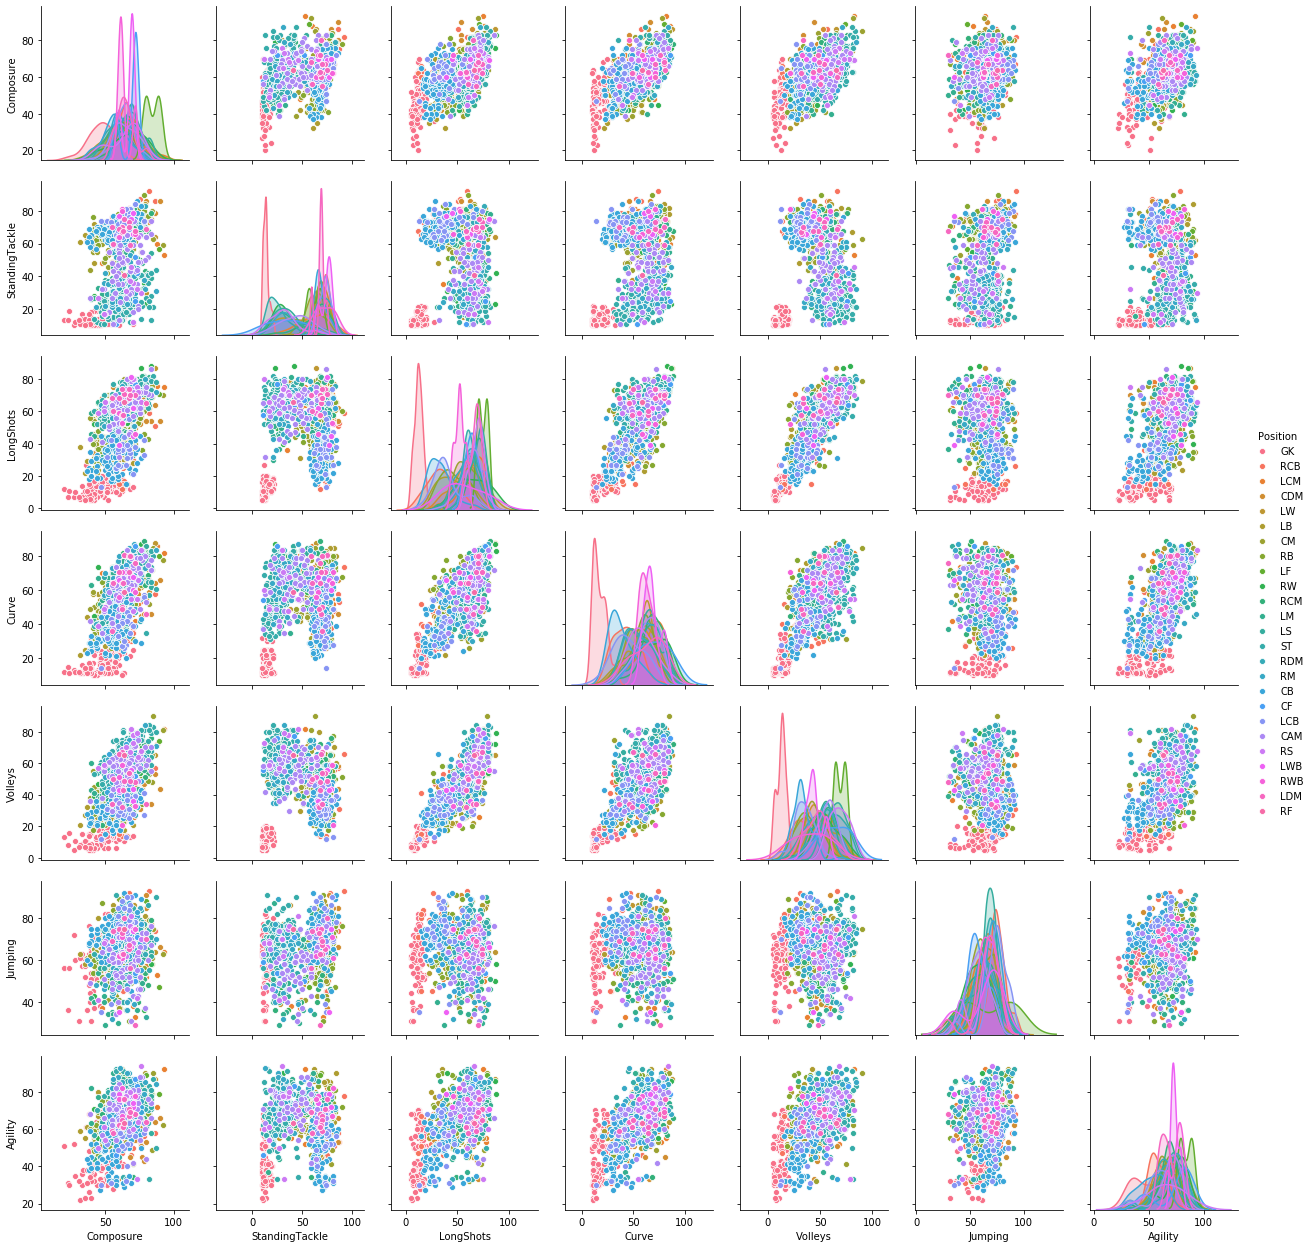

In [193]:
# We can do this pretty easily with Seaborn, however, for very large data frames, 
# this is computationally expensive to plot. So we'll focus on one country, Spain!
sns.pairplot(fifa[fifa.Nationality=='Spain'][['Composure', 'StandingTackle', 'LongShots', 
                                              'Curve', 'Volleys', 'Jumping', 'Reactions', 'Position']], hue='Position');

This is a classic example of where too many colours really messes up any possible messages that could be extracted from a visualization.

If we think back to our lectures, we stated that we should have between 8-10 colours at a maximum. Here we've violated that guideline by having 28!

We need to reduce the number of colours, and there are a number of strategies, but all centre around a need to reduce the number of categories we want to show.

To take 28 to a lower number, we can:
 
 * Focus on particular sets of positions; or
 * Map these very specific positions to more general ones. e.g. RCB and LCD is a type of Defender. 
 
We'll try the second one now. This will be our first foray in to data cleaning, a key job in data science :)

We can do this by using a mapping dictionary between the fine-grained positions to a more general one. Then we use the apply function on the position field to map the values.

In [274]:
mapping = {'RCB': 'DEF', 'LCB': 'DEF', 'CB': 'DEF',
           'LB': 'DEF', 'RB': 'DEF', 
           'LWB': 'DEF', 'RWB': 'DEF',
           'CDM': 'MID', 'RM': 'MID',
           'LCM': 'MID', 'RCM': 'MID', 'LM': 'MID', 'CAM': 'MID',
           'LDM': 'MID', 'RDM': 'MID',
           'LAM': 'MID', 'RAM': 'MID',
           'CM': 'MID', 'LW': 'MID', 'RW': 'MID',
           'LS': 'ST', 'RS': 'ST', 'RF': 'ST', 'LF': 'ST', 'CF': 'ST'
          }
fifa['GeneralPosition'] = fifa.Position.apply(lambda x: mapping[x] if x in mapping else x )

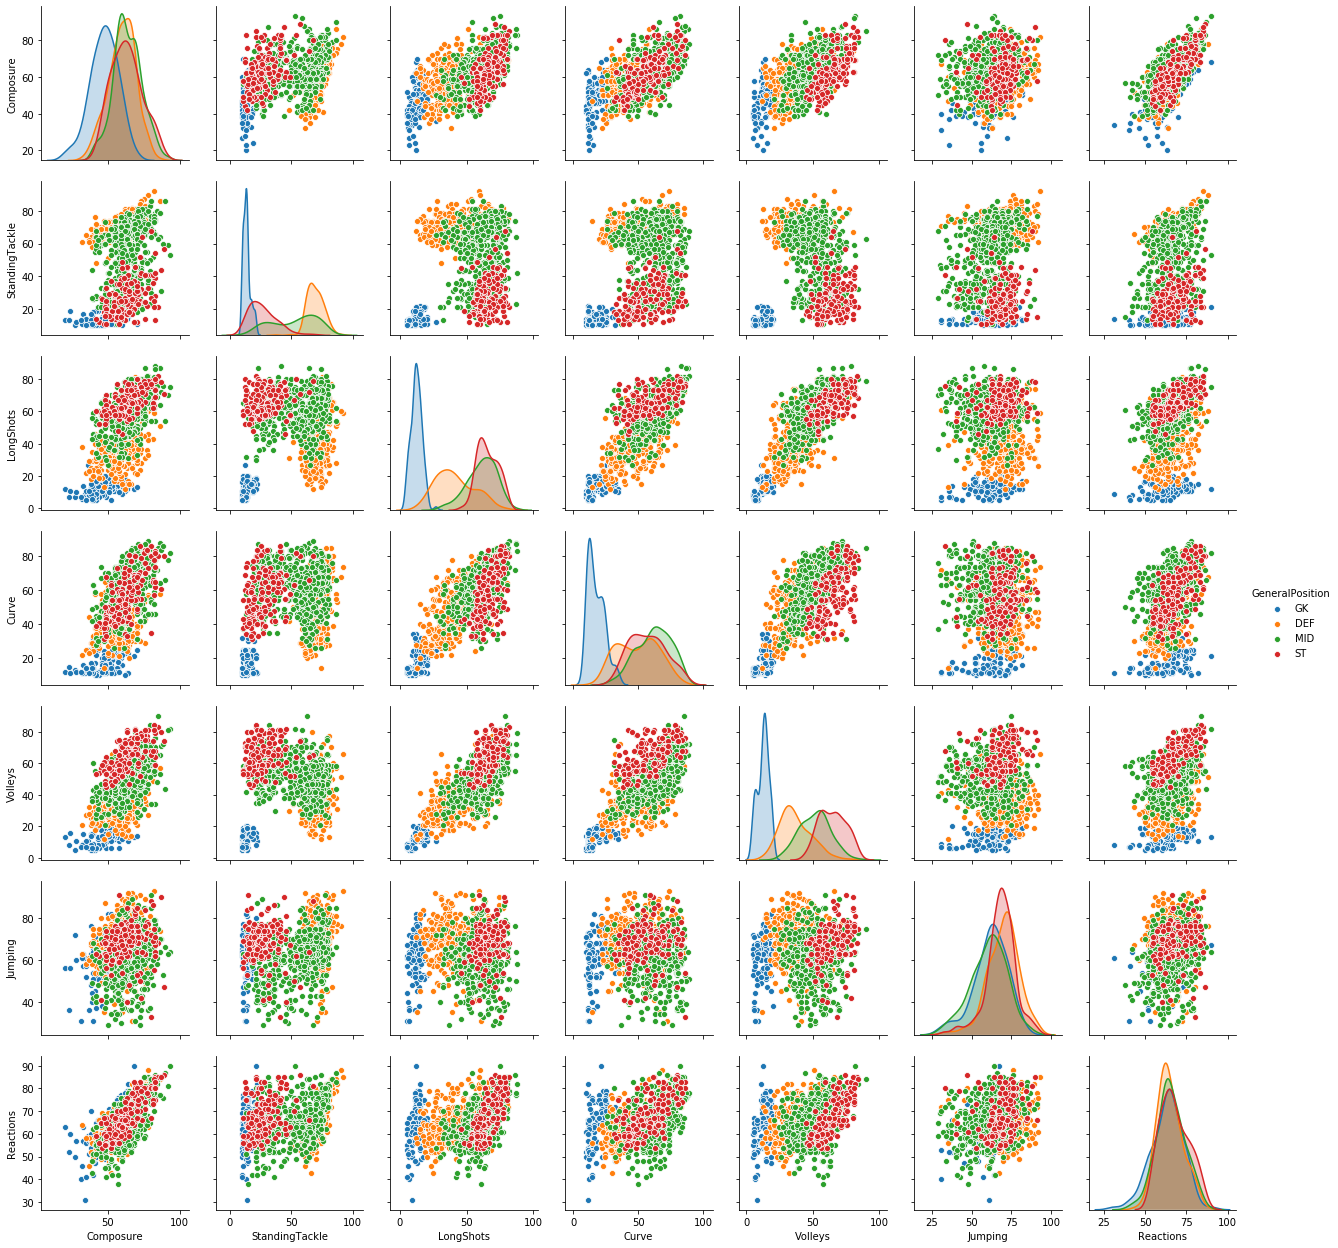

In [194]:
sns.pairplot(fifa[fifa.Nationality=='Spain'][['Composure', 'StandingTackle', 'LongShots', 
                                              'Curve', 'Volleys', 'Jumping', 'Reactions', 'GeneralPosition']], hue='GeneralPosition');

<p style="color:#f1c40f; font-size: 2em">Exercise 5</p>

<br/>
<div style="background: #f1c40f; padding: 10px; color: #2c3e50"><p>EASY: This is a great example of a potentially nice visualization can be messed up by a terrible colour map.<br/>
How would you go about improving this visualization?</p>
</div>

In [ ]:
# Answer 8

Plotting individual points is cool, but there is a lot of noise in these plots. There are other techniques you can use to increase the saliency of content in the visualization. 

A key question to always ask yourself is, what do I really want to see? In this instance, I want to see which values are more correlated with each other. Therefore having all the points, while nice, will slow down my visualization, and add noise.

So, with that in mind, let's look at visualizing this data in a more clean way using Kernel Density Estimations.

### PairGrids

We can also create some pretty advanced visualizations by combining different types of plots. 

For instance, we want to show: 
 * a **scatter plot** to the **right of the diagonal**;
 * a **KDE plot** to the **left of the diagonal**;
 * a **histogram** in the **diagonal**;
 
Seaborn allows us to compose these plots together like so.

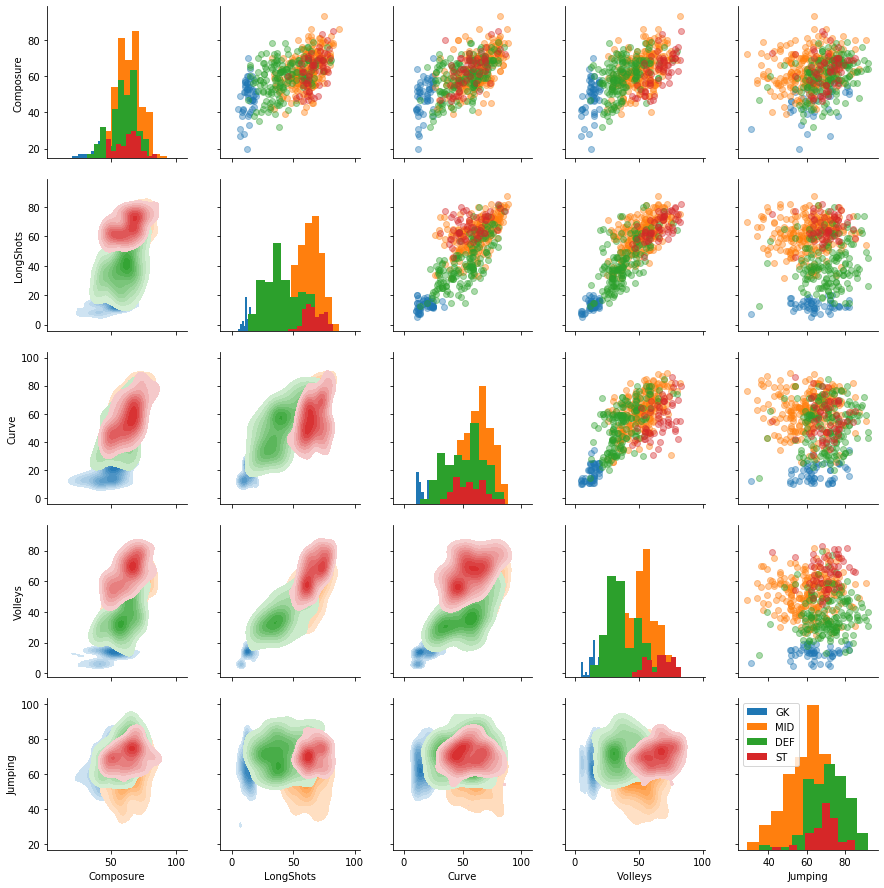

In [215]:
g = sns.PairGrid(fifa[fifa.Nationality=='Spain'][['Composure', 'LongShots', 'Curve', 'Volleys', 'Jumping', 'GeneralPosition']].sample(500), hue='GeneralPosition')
g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False)
g.map_diag(plt.hist, bins=10);

plt.legend(loc='best')

<div style="background: #f1c40f; padding: 10px; color: #2c3e50"><p>EASY: Switch out my variables for some that you are interested in.<br/></p>
</div>

In [ ]:
# Answer 9

## Heatmaps

While the techniques we've shown above are good for a few data points, they don't scale so well. What we often do instead is go for a global view of the data first in order to understand the relationships at a macro level.

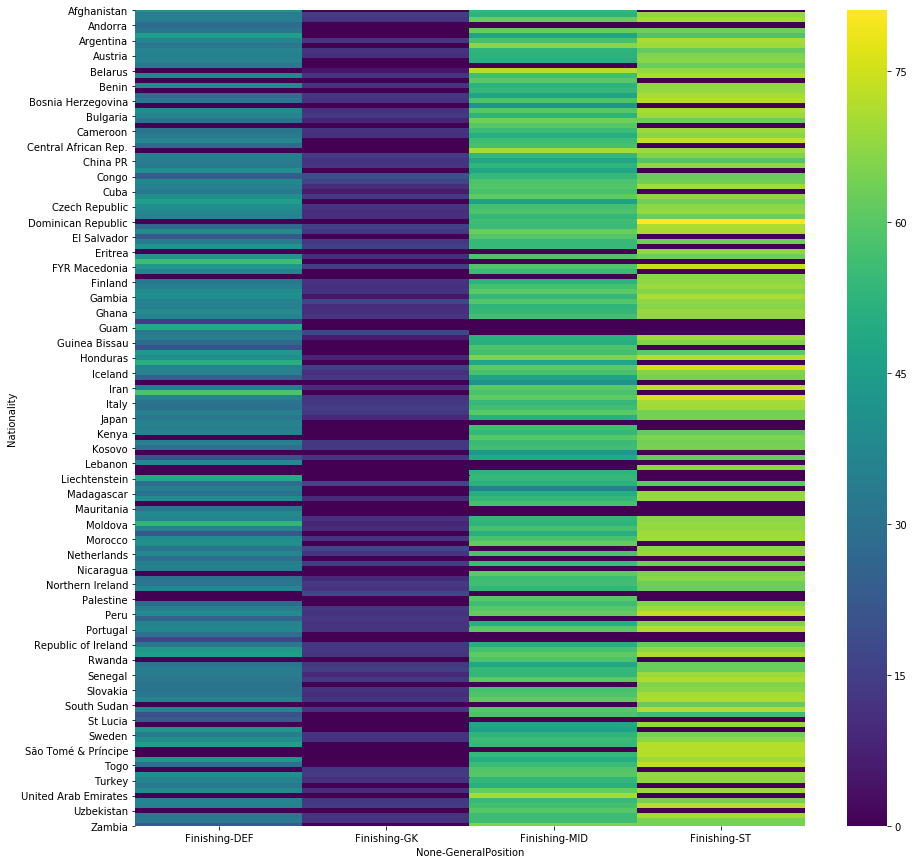

In [299]:
plt.figure(figsize=(15,15))
sns.heatmap(fifa.pivot_table(index=['Nationality'], columns=['GeneralPosition'], values=['Finishing'], aggfunc='mean').fillna(0), cmap='viridis')

As we saw in the lectures, it is difficult to interpret such images without there being some order in place. Therefore, we can use a function 

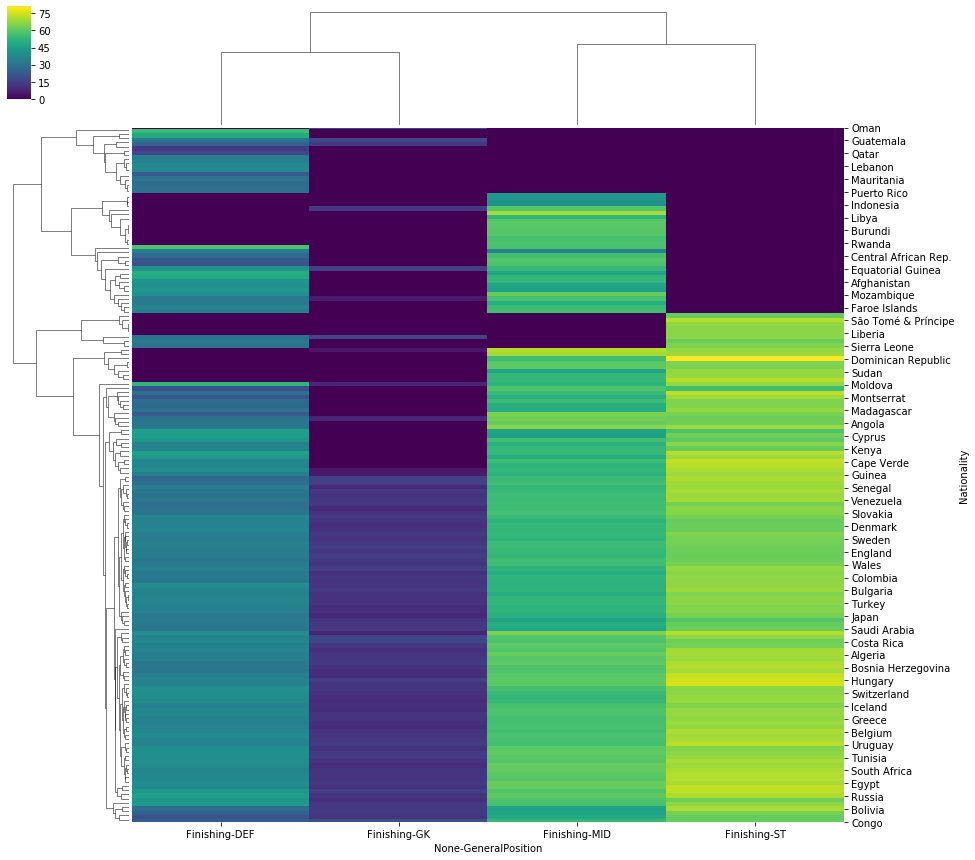

In [304]:
# plt.figure()
sns.clustermap(fifa.pivot_table(index=['Nationality'], columns=['GeneralPosition'], values=['Finishing'], aggfunc='mean').fillna(0), cmap='viridis',figsize=(15,15))

<p style="color:#f1c40f; font-size: 2em">Exercise 6</p>

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">EASY: You can quickly calculate all feature correlations using the .corr() function from Pandas, but reading all these numbers is a cognitively demanding task. How can we visualize such data? Hint, have a look at the seaborn gallery :)</p>

In [ ]:
# Answer 10

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">EASY: Use the clustermap to bring some order to this currently wild visualization.</p>

In [ ]:
# Answer 11

### Parallel Coordinates

My favourite! Perfect for visualizing many variables at once.

In [218]:
from pandas.plotting import parallel_coordinates

In [309]:
spanish_players = fifa[fifa.Nationality  == 'Spain']
string_columns = [fifa.columns[idx] for idx, data_type in enumerate(fifa.dtypes) if data_type == 'object']

# We want to keep the GeneralPosition column (to colour our coordinates) 
string_columns.pop(string_columns.index('GeneralPosition'));

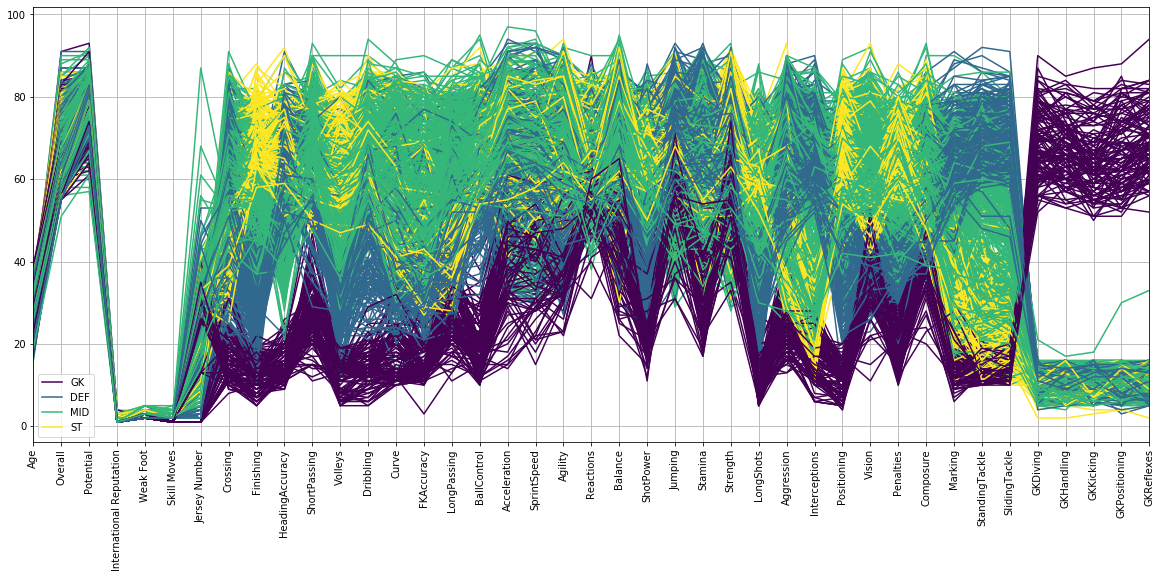

In [310]:
plt.figure(figsize=(20, 8))
_df = spanish_players.drop(['ID', 'Special'] + string_columns, axis=1).dropna()
g = parallel_coordinates(_df, 'GeneralPosition', colormap='viridis', axvlines=False)
plt.legend(loc='best')
plt.setp(g.get_xticklabels(), rotation=90);

#### Placing Correlated Columns Closer together

Now, as we discussed in the lecture, the utility of the Parallel Coordinates is greatly influenced by the ordering of the columns. Can we order the columns so that the most correlated features are closer together?

Here, we will use the clustermap function from Seaborn, which also gives us a rather nice chart. 

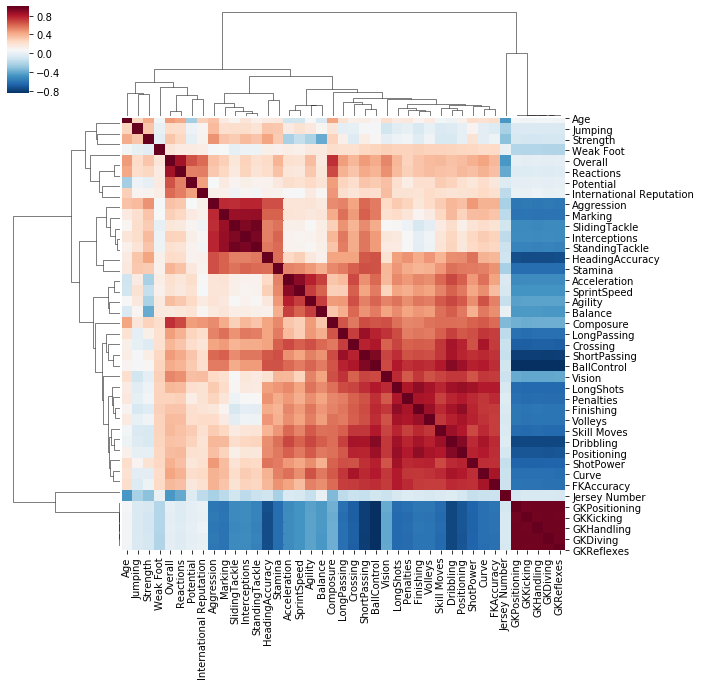

In [311]:
clustermap = sns.clustermap(_df.corr(), cmap='RdBu_r')

You'll see that it automatically performs hierarchical clustering on the correlation matrix, so we can see that there are groups of features that are highlighly correlated, in particular:

 * Goalkeeper features in particular;
 * Defending features such as Aggression, Marking, SlidingTackle, and Interceptions;
 * Physical features such as Stamina, Acceleration, SprintSpeed, Agility, and Balance;
 * Passing features such as BallControl, LongPassing, ShortPassing, and Crossing; and
 * Shooting features such as Finishing and Volleys
 
We can access this 'Dendrogram' (the technical term for the tree visualization on columns and rows) easily via this command.

In [265]:
_df.columns[clustermap.dendrogram_row.reordered_ind]

Index(['Age', 'Jumping', 'Strength', 'Weak Foot', 'Overall', 'Reactions',
       'Potential', 'International Reputation', 'Aggression', 'Marking',
       'SlidingTackle', 'Interceptions', 'StandingTackle', 'HeadingAccuracy',
       'Stamina', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance',
       'Composure', 'LongPassing', 'Crossing', 'ShortPassing', 'BallControl',
       'Vision', 'LongShots', 'Penalties', 'Finishing', 'Volleys',
       'Skill Moves', 'Dribbling', 'Positioning', 'ShotPower', 'Curve',
       'FKAccuracy', 'Jersey Number', 'GKPositioning', 'GKKicking',
       'GKHandling', 'GKDiving', 'GKReflexes'],
      dtype='object')

Now, we can plug this in to the Parallel Coordinates visualization to try and reduce the work required by the users of our visualization, or indeed us!

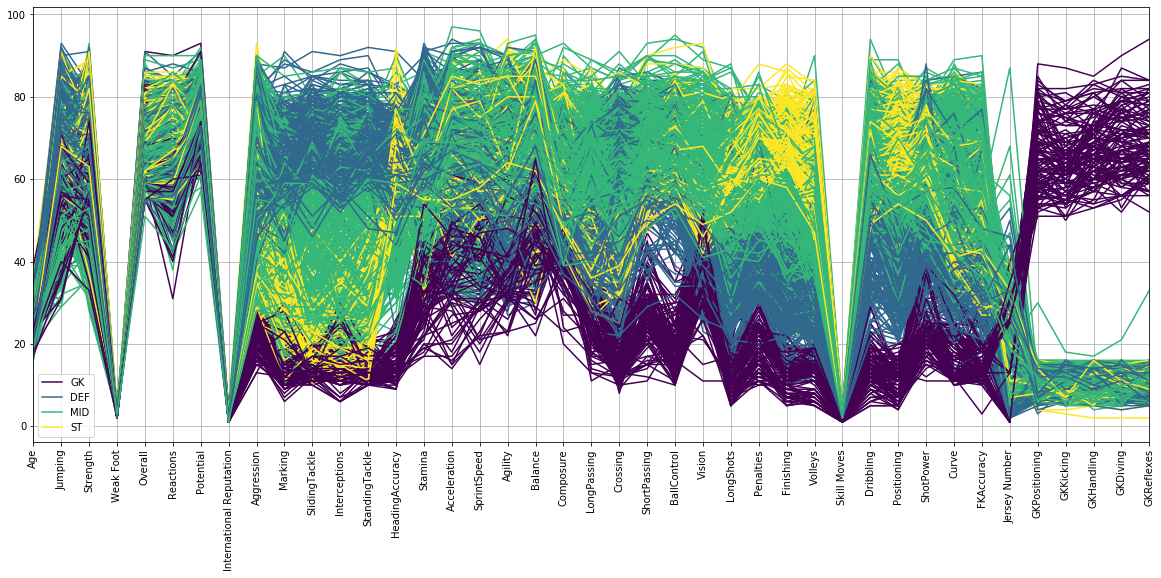

In [266]:
plt.figure(figsize=(20, 8))
g = parallel_coordinates(_df.dropna(), 'GeneralPosition', cols=_df.columns[clustermap.dendrogram_row.reordered_ind], axvlines=False, colormap='viridis')
plt.legend(loc='best')
plt.setp(g.get_xticklabels(), rotation=90);

## Faceted Visualizations

How you split the data can also provide many insights, and there are many ways in which we could split this data (which is why I chose it :)).

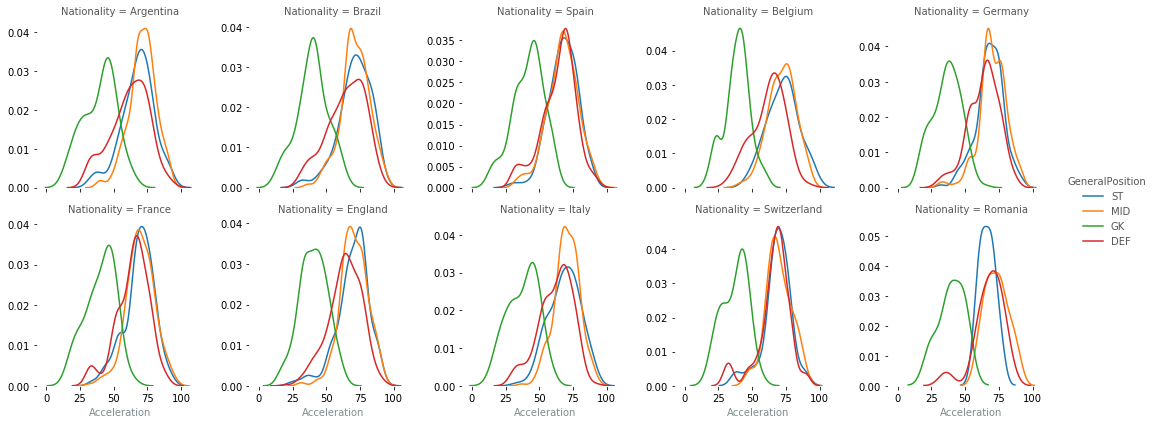

In [325]:
# or with linear regression
g = sns.FacetGrid(fifa[fifa.Nationality.isin(['Italy', 'France', 'Brazil', 'Belgium', 'Germany', 'Spain', 'Argentina', 'England', 'Switzerland', 'Romania'])], col="Nationality", size=3, aspect=1, col_wrap=5, hue='GeneralPosition', sharex=True, sharey=False)
g.map(sns.kdeplot, 'Acceleration').add_legend()